# Input and Output

## Keyboard input

Python has a function called *input* for getting input from the user and assigning it a variable name. It has the form

In [73]:
value=input("Tell me a number: ")
type(value)

Tell me a number:  12


str

The value contains the keyboard input as expected, but it is a string (the u stands for “uni-code” which refers to the string coding system Python uses). Because we want to use a number and not a string, we need to convert it from a string to a number. We can do that with the eval function by writing:

In [74]:
v = eval(value)
type(v)

int

## Screen output

Screen output is possible by using the *print* command. The argument of the print function can be of different type. If you want to achieve a specific format, you may want to use a formatted string. A formatted string can be given to the *print* function by str.format() where str is a string that contains text that is written to be the screen, as well as certain format specifiers contained in curly braces {}. The format function contains the list of variables that are to be printed. The commands in the input line below show the use of the formating in different ways. Try to modify the script and observe the resulting output.

In [29]:
string1 = "How"
string2 = "are you my friend?"
int1 = 34
int2 = 942885
float1 = -3.0
float2 = 3.141592653589793e-14
print(' ***')

print(string1)
print(string1 + ' ' + string2)
print(' 1. {} {}'.format(string1, string2)) 
print(' 2. {0:s} {1:s}'.format(string1, string2))
print(' 3. {0:s} {0:s} {1:s} - {0:s} {1:s}'.format(string1, string2)) 
print(' 4. {0:10s}{1:5s}'.format(string1, string2))
print(' ***')
print(int1, int2)
print(' 6. {0:d} {1:d}'.format(int1, int2)) 
print(' 7. {0:8d} {1:10d}'.format(int1, int2)) 
print(' ***')
print(' 8. {0:0.3f}'.format(float1))
print(' 9. {0:6.3f}'.format(float1)) 
print('10. {0:8.3f}'.format(float1)) 
print(2*' 11. {0:8.3f}'.format(float1))
print(' ***')
print('12. {0:0.3e}'.format(float2)) 
print('13. {0:10.3e}'.format(float2)) 
print('14. {0:10.3f}'.format(float2))
print(' ***')
print('15. 12345678901234567890')
print('16. {0:s}--{1:8d},{2:10.3e}'.format(string2, int1, float2))

 ***
How
How are you my friend?
 1. How are you my friend?
 2. How are you my friend?
 3. How How are you my friend? - How are you my friend?
 4. How       are you my friend?
 ***
34 942885
 6. 34 942885
 7.       34     942885
 ***
 8. -3.000
 9. -3.000
10.   -3.000
 11.   -3.000 11.   -3.000
 ***
12. 3.142e-14
13.  3.142e-14
14.      0.000
 ***
15. 12345678901234567890
16. are you my friend?--      34, 3.142e-14


## File input/output

### File I/O with NumPy

In [4]:
import numpy as np # don't forget to import numpy

#### Reading data from a text file


Often you would like to analyze data that you have stored in a text file. Consider, for example, the data file below for an experiment measuring the free fall of a mass.

~~~
Data for falling mass experiment
Date: 16-Aug-2013
Data taken by Frank and Ralf
data point	time (sec) 	height (mm)	uncertainty (mm)
0		0.0		180		3.5
1		0.5		182		4.5
2		1.0		178		4.0
3		1.5		165		5.5
4		2.0		160		2.5
5		2.5		148		3.0
6		3.0		136		2.5
~~~

We would like to read these data into a Python program, associating the data in each column with an appropriately named array. While there are a multitude of ways to do this in Python, the simplest by far is to use the NumPy `loadtxt` function, whose use we illustrate here. Suppose that the name of the text file is **MyData.txt**. Then we can read the data into four different arrays with the following statement


In [56]:
dataPt, time, height, error = np.loadtxt("MyData.txt", skiprows=4 , unpack=True)

If you don't want to read in all the columns of data, you can specify which columns to read in using the usecols key word. For example, the call

In [57]:
time, height = np.loadtxt("MyData.txt", skiprows=5 , usecols = (1,2), unpack=True)

reads in only columns 1 and 2; columns 0 and 3 are skipped.

#### Writing data to a text file

There are plenty of ways to write data to a data file in Python. We will stick to one very simple one that’s suitable for writing data files in text format. It uses the NumPy [savetxt](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.savetxt.html) routine, which is the counterpart of the loadtxt routine introduced in the previous section. The general form of the routine is

~~~
savetxt(filename, array, fmt="%0.18e", delimiter=" ", newline="\n", header="", footer="", comments="# ")
~~~

We illustrate savetext below with a script that first creates four arrays by reading in the data file MyData.txt, as discussed in the previous section, and then writes that same data set to another file MyDataOut.txt.

In [58]:
dataPt, time, height, error = np.loadtxt("MyData.txt", skiprows=5 , unpack=True)

In [59]:
np.savetxt('MyDataOut.txt',list(zip(dataPt, time, height, error)), fmt="%12.1f")

In [60]:
!cat MyDataOut.txt

         1.0          0.5        182.0          4.5
         2.0          1.0        178.0          4.0
         3.0          1.5        165.0          5.5
         4.0          2.0        160.0          2.5
         5.0          2.5        148.0          3.0
         6.0          3.0        136.0          2.5


### File I/O with Pandas

Pandas is a software library written for the Python programming language. It is used for data manipulation and analysis. It provides special data structures and operations for the manipulation of numerical tables and time series and builds on top of numpy.

- Easy handling of missing data
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
   
The data formats provided by the pandas module are used by several other modules, such as the [trackpy](https://soft-matter.github.io/trackpy/v0.3.2/) which is a moduly for feature tracking and analysis in image series.

#### Short intro to Pandas

In [2]:
import pandas as pd # import the pandas module

Pandas provides two data structures

* Series
* Data Frames

A **[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers,
Python objects, etc.). The axis labels are collectively referred to as the index. 

In [63]:
my_simple_series = pd.Series(np.random.randn(7), index=['a', 'b', 'c', 'd', 'e','f','g'])
my_simple_series.head()

a    0.400692
b    0.192138
c   -0.166063
d   -0.075867
e   -0.361814
dtype: float64

There is a whole lot of functionality built into pandas data types. You may of course also obtain the same functionality using numpy commands, but you may find the pandas abbrevations very useful.

In [64]:
my_simple_series.agg(['min','max','sum','mean']) # aggregate a number of properties into a single array

min    -0.876509
max     0.870088
sum    -0.017335
mean   -0.002476
dtype: float64

A **[DataFrame](https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe)** is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). The example below shows how such a DataFrame can be generated from the scratch. In addition to the data supplied to the DataFrame method, an index column is generated when creating a DataFrame. As in the case of *Series* there is a whole lot of functionality integrated into the DataFrame data type which you may explore on the website.

In [65]:
df = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['column 1', 'column 2', 'columns 3', 'column 4', 'column 5'])
df.head()

,column 1,column 2,columns 3,column 4,column 5
0,4,9,2,2,8
1,4,9,0,9,5
2,1,3,2,6,0
3,8,0,8,1,4
4,4,2,6,9,3


Due to the labelling of the columns, each column may be accessed by its column label. Labeling by names  improves readability considerably.

In [66]:
df['column 1']

0    4
1    4
2    1
3    8
4    4
Name: column 1, dtype: int64

If you don't like this format, you can always return to a simple numpy array with the *as_matrix()* method.

In [67]:
df.values

array([[4, 9, 2, 2, 8],
       [4, 9, 0, 9, 5],
       [1, 3, 2, 6, 0],
       [8, 0, 8, 1, 4],
       [4, 2, 6, 9, 3]])

#### Reading CSV data with Pandas

DataFrames may also be populated by text files such as comma separated value files (short *.csv*). These files contain data in text format but also a column label, which can be read by the pandas method *read_csv()*. You can find an example below, which reads the data from the dust sensor on my balcony from April, 11th. You see the different columns, where **P1** and **P2** correspond to the **PM10** and **PM2.5** dust values in $\mu g/m^3$.

In [68]:
data = pd.DataFrame()
data = pd.read_csv("2018-04-11_sds011_sensor_12253.csv",delimiter=";",parse_dates=False)
data.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,12253,SDS011,6189,52.527,13.39,2018-04-11T00:01:58,25.87,NaN,NaN,19.37,NaN,NaN
1,12253,SDS011,6189,52.527,13.39,2018-04-11T00:04:24,25.63,NaN,NaN,20.53,NaN,NaN
2,12253,SDS011,6189,52.527,13.39,2018-04-11T00:06:55,26.30,NaN,NaN,22.00,NaN,NaN
3,12253,SDS011,6189,52.527,13.39,2018-04-11T00:09:23,24.60,NaN,NaN,20.30,NaN,NaN
4,12253,SDS011,6189,52.527,13.39,2018-04-11T00:11:51,25.17,NaN,NaN,20.23,NaN,NaN


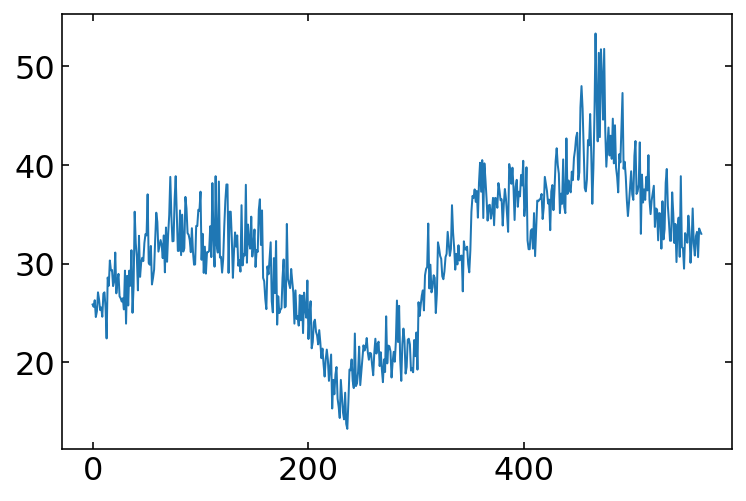

In [69]:
data['P1'].plot()


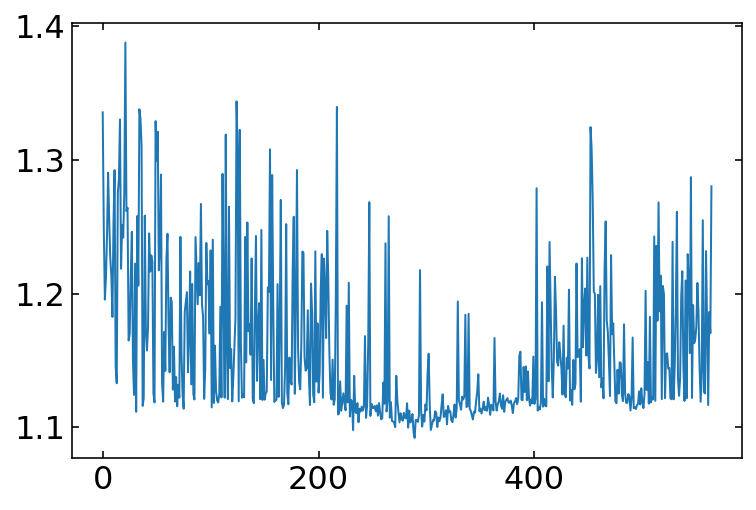

In [70]:
(data['P1']/data['P2']).plot()